### Text Classification using Keras Hub - Intermediate Level

This notebook demonstrates an intermediate-level text classification task using the AG News dataset.  
It applies a text vectorization layer and a custom deep learning model built on Keras for multi-class classification.  


In [1]:
import tensorflow as tf
import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

### Load the AG News text dataset  
Downloads and loads the AG News classification dataset with four categories.  
Each entry includes a news headline and a corresponding category label.


In [2]:
dataset, dataset_info = tfds.load("ag_news_subset", as_supervised=True, with_info=True)
data_train, data_test = dataset["train"].batch(128), dataset["test"].batch(128)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.YQNVVC_1.0.0/ag_news_subset-train.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.YQNVVC_1.0.0/ag_news_subset-test.tfrecord*...:  …

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.


### Prepare the text vectorization layer  
Configures the vectorizer with vocabulary size and sequence length.  
The layer is adapted to the dataset to learn the token distribution.


In [3]:
# Load text vectorization
text_vectorizer = keras.layers.TextVectorization(max_tokens=20000, output_mode="int", output_sequence_length=256)

In [4]:
# Prepare text vectorization
text_only_train = data_train.map(lambda x, y: x)
text_vectorizer.adapt(text_only_train)

### Build the model architecture  
Creates a sequential model with an embedding layer, dropout, and dense output layer.  
It is designed for multi-class text classification on the AG News dataset.


In [5]:
# Build the model
inputs = keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = keras.layers.Embedding(input_dim=20000, output_dim=32)(x)
x = keras.layers.Conv1D(64, kernel_size=5, activation="relu")(x)
x = keras.layers.GlobalMaxPooling1D()(x)
x = keras.layers.Dense(64, activation="relu")(x)
x = keras.layers.Dense(4, activation="softmax")(x)  # 4 classes for AG News
model = keras.Model(inputs, x)

In [6]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
# Display sample text from dataset
sample_text, sample_label = next(iter(data_train.take(1)))
for i in range(3):  # Show 3 text samples
    print(f"News {i+1}: {sample_text[i].numpy().decode('utf-8')}")
    print(f"Category: {sample_label[i].numpy()}\n")

News 1: AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.
Category: 3

News 2: Reuters - Major League Baseball\Monday announced a decision on the appeal filed by Chicago Cubs\pitcher Kerry Wood regarding a suspension stemming from an\incident earlier this season.
Category: 1

News 3: President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.
Category: 2



In [9]:
# Train the model
history = model.fit(data_train, validation_data=data_test, epochs=4)

Epoch 1/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9008 - loss: 0.2923 - val_accuracy: 0.9092 - val_loss: 0.2765
Epoch 2/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.9363 - loss: 0.1867 - val_accuracy: 0.9076 - val_loss: 0.2858
Epoch 3/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.9590 - loss: 0.1243 - val_accuracy: 0.9018 - val_loss: 0.3292
Epoch 4/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.9767 - loss: 0.0751 - val_accuracy: 0.8963 - val_loss: 0.3886


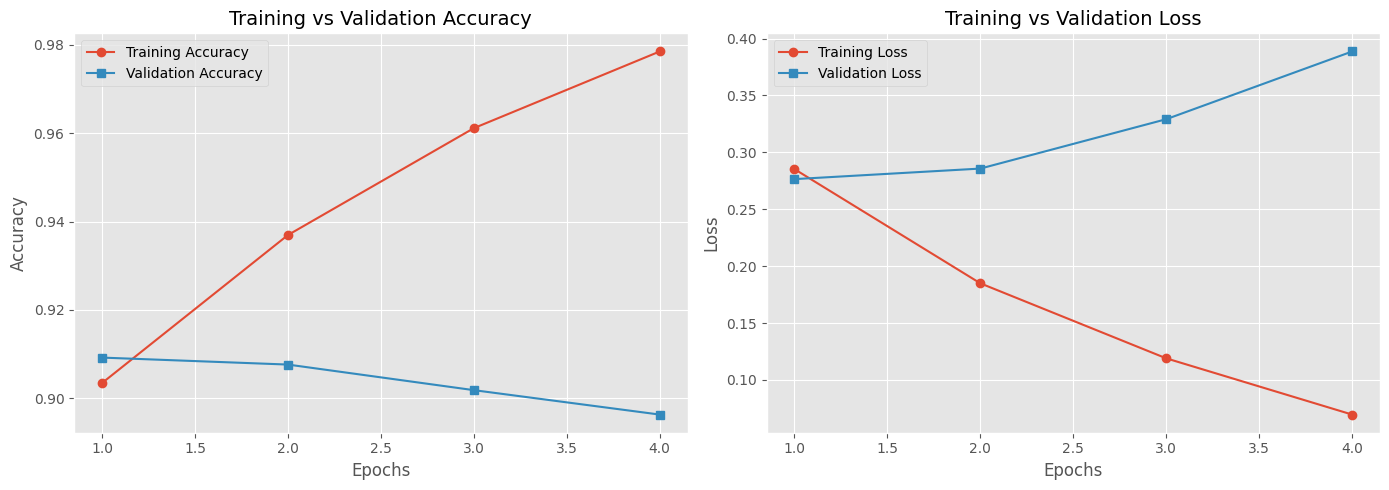

In [10]:
import matplotlib.pyplot as plt

def plot_advanced_text_training_history(history):
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(acc) + 1)

    plt.style.use('ggplot')  # Built-in clean style

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy Plot
    axes[0].plot(epochs, acc, label='Training Accuracy', marker='o')
    if val_acc:
        axes[0].plot(epochs, val_acc, label='Validation Accuracy', marker='s')
    axes[0].set_title('Training vs Validation Accuracy', fontsize=14)
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].legend()
    axes[0].grid(True)

    # Loss Plot
    axes[1].plot(epochs, loss, label='Training Loss', marker='o')
    if val_loss:
        axes[1].plot(epochs, val_loss, label='Validation Loss', marker='s')
    axes[1].set_title('Training vs Validation Loss', fontsize=14)
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_advanced_text_training_history(history)
